In [1]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
#import array as arr

#### Definindo evolução temporal

In [2]:
def get_ev(rule=None, verbose=0):
    msg = "Please provide the number of the cellular automata to be generated: "
    if rule is None: rule = int(input(msg))
    while rule<1 or rule>256:  # rule not in range(1, 257):
        print("Error: please provide a number between 1 and 256.\n")
        rule = int(input(msg))
    if verbose: print("Rule =", rule)

    ev = bin(rule-1).replace("0b","")
    ev = [int(k) for k in ev]
    ev[:0] = [0] * (8 - len(ev))
#    ev = ev[::-1]

    if verbose: print("Evolution =", ev)
    return ev

# ev = [int((bin(k-1).replace("0b", ""))//10**i)%2 for i in range(8)] ; print(ev)

#### Condição inicial: um ponto no meio

In [3]:
def init_random(N):
    bb = np.random.randint(0, 2, size=N)
    return list(bb)
    # return [np.random.randint(0, 2) for _ in range(N)]

def init_config_1(N):
    assert (isinstance(N, int) and N > 0), "Erro: informar N inteiro positivo"
    s0 = []
    for i in range(0, (N-1)//2):
        s0.append(0)
    s0.append(1)
    for i in range((N+1)//2, N):
        s0.append(0)
    return s0

N = 11
# N = int(input("Please provide the size of the lattice: "))

s0 = init_random(N) # init_config_1(N)
print(s0)

[1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]


In [4]:
def cell_aut_1d(L0=None, rule=None, t_max=None, cc="p", Fix_i=0, Fix_f=0, N=11, verbose=0):
    
    err_cc = "Error. Insert valid boundary condition"
    if rule is None: rule = np.random.randint(1, 257)
    if L0 is None: L0 = init_random(N)
    if t_max is None: t_max = 2*N
    if cc=="f" and [Fix_i, Fix_f] not in [[0, 0], [0, 1], [1, 0], [1, 1]]:
        print(err_cc)

    ev = get_ev(rule)
    L_total = []
    L_total.append(L0)
    L = L0.copy()
    novo_L = []
    if verbose==1: print(L0, "j =", 0)
    
    if cc == "p":
        for j in range(0,t_max):
            L.append(L[0])
            novo_L = []
            for i in range(0, N):
                ind_i = L[i-1]*4 + L[i]*2 + L[i+1]
                novo_L.append(ev[ind_i])
            if verbose==1: print(novo_L, "j =", j+1)
            L = novo_L.copy()
            L_total.append(L)

    elif cc == "f":
        for j in range(0, t_max):
            novo_L = []
            ind_0 = Fix_i*4 + L[0]*2 + L[1]
            novo_L.append(ev[ind_0])
            for i in range(1, N-1):
                ind_i = L[i-1]*4 + L[i]*2 + L[i+1]
                novo_L.append(ev[ind_i])
            ind_N_1 = L[N-2]*4 + L[N-1]*2 + Fix_f
            novo_L.append(ev[ind_N_1])
            if verbose==1: print(novo_L, "j =", j+1)
            L = novo_L.copy()
            L_total.append(L)
      
    else: return print(err_cc)
    
    return N, t_max, L_total

In [75]:
_, _, Lista_teste = cell_aut_1d()
Lista_teste

[[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [6]:
n, T, Lista = cell_aut_1d(L0 = init_config_1(N), rule=131, cc="f", N=11, verbose=0) #L0=init_config_1(11)

x = []
y = []

#for t in range(0, T+1):
#    values = list(enumerate(Lista[t]))
#    plt.plot(values[t][0], [t]*N)

In [7]:
values_0 = [values[k][0] for k in range(len(values))]
values_0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
values

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 1),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0)]

## Plot ponto a ponto

In [80]:
def plot_ponto_a_ponto(Lista=None, markersize=10):
    for i in range(len(Lista)):
        for j in range(len(Lista[i])):
            if Lista[i][j] == 1:
                plt.plot(j, i, "sk", markersize)
            else: None
    plt.show()

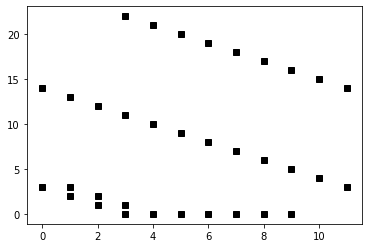

In [86]:
#_, _, Lista_teste = cell_aut_1d()
plot_ponto_a_ponto(Lista=Lista_teste)

In [87]:
Lista_teste

[[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]